In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [85]:
df1 = pd.read_csv('fact_election_results.csv', encoding='latin1')
df2 = pd.read_csv('new_state_code.csv')

In [86]:
df1.head()

,election_year,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,election_result_id,state_id
0,2014,Punjab,Amritsar,Amarinder Singh,M,36,GEN,IND,Brush,1151,0,1151,1477262,1,28
1,2014,Punjab,Amritsar,Arun Kumar Joshi,M,40,GEN,IND,Shuttle,9023,0,9023,1477262,2,28
2,2014,Punjab,Amritsar,Dr. Inderpal,M,52,SC,IND,Kite,3083,0,3083,1477262,3,28
3,2014,Punjab,Amritsar,Sham Lal Gandhiwadi,M,32,SC,IND,Kettle,2691,0,2691,1477262,4,28
4,2014,Punjab,Amritsar,Surinder Kumar Khosla,M,45,SC,IND,Air Conditioner,2396,0,2396,1477262,5,28


In [87]:
df2.head()

,state_name,abbreviation,2013-14,2018-19
0,Andaman & Nicobar Islands,AN,111087.0,204254.0
1,Andhra Pradesh,AP,82870.0,154031.0
2,Arunachal Pradesh,AR,94135.0,155103.0
3,Assam,AS,49734.0,81034.0
4,Bihar,BR,26948.0,40715.0


In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16952 entries, 0 to 16951
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   election_year       16952 non-null  int64 
 1   state               16952 non-null  object
 2   pc_name             16952 non-null  object
 3   candidate           16952 non-null  object
 4   sex                 16952 non-null  object
 5   age                 16952 non-null  int64 
 6   category            16952 non-null  object
 7   party               16952 non-null  object
 8   party_symbol        16952 non-null  object
 9   general_votes       16952 non-null  int64 
 10  postal_votes        16952 non-null  int64 
 11  total_votes         16952 non-null  int64 
 12  total_electors      16952 non-null  int64 
 13  election_result_id  16952 non-null  int64 
 14  state_id            16952 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.9+ MB


In [89]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
election_year,16952.0,NaN,NaN,NaN,2016.535689,2.499819,2014.0,2014.0,2019.0,2019.0,2019.0
state,16952,36,Uttar Pradesh,2427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pc_name,16952,549,Nizamabad,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
candidate,16952,14547,NOTA,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,16952,4,M,14531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,16952.0,NaN,NaN,NaN,47.031737,11.646882,24.0,38.0,46.0,55.0,93.0
category,16952,5,GEN,10635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
party,16952,899,IND,6557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
party_symbol,16952,273,NOTA,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
general_votes,16952.0,NaN,NaN,NaN,66717.465727,158091.644762,84.0,1480.75,3855.0,13488.0,1066824.0


In [90]:
df1.isnull().sum()

,0
election_year,0
state,0
pc_name,0
candidate,0
sex,0
age,0
category,0
party,0
party_symbol,0
general_votes,0


In [91]:
df1.duplicated().sum()

np.int64(0)

In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state_name    36 non-null     object 
 1   abbreviation  36 non-null     object 
 2   2013-14       33 non-null     float64
 3   2018-19       33 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.3+ KB


In [93]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state_name,36,36,Andaman & Nicobar Islands,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abbreviation,36,36,AN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-14,33.0,NaN,NaN,NaN,101249.121212,51688.654376,26948.0,61907.0,94135.0,123388.0,227900.0
2018-19,33.0,NaN,NaN,NaN,166776.060606,90658.210974,40715.0,98738.0,155103.0,204254.0,423716.0


In [94]:
df2.duplicated().sum()

np.int64(0)

In [95]:
df2.isnull().sum()

,0
state_name,0
abbreviation,0
2013-14,3
2018-19,3


In [96]:
df2[df2.isnull().any(axis=1)]

,state_name,abbreviation,2013-14,2018-19
9,Dadra & Nagar Haveli,DN,NaN,NaN
11,Daman & Diu,DD,NaN,NaN
24,Lakshadweep,LD,NaN,NaN


### Handling Missing Economic Data (PC NSDP)

During the merge of election turnout data with MoSPI’s **Per Capita NSDP (Current Prices)** dataset, a few regions were found to have **missing (NULL)** economic values. Specifically, the following regions do not have Per Capita NSDP values available in the source dataset:

- **Dadra and Nagar Haveli and Daman and Diu**
- **Lakshadweep**

These rows were **excluded from correlation-based analysis** (e.g., GDP vs turnout, GDP vs postal vote %) because imputing missing economic values using mean/median would introduce **artificial numbers** that do not reflect the real economy of these regions. Such imputation would **distort statistical relationships** and could lead to misleading conclusions (for example, inflating or deflating correlation strength).

✅ Therefore, to preserve analytical integrity, we keep these records as missing and **remove them only for analyses that require economic indicators**, while retaining them in the dataset for completeness.


In [97]:

def norm_state(x):
    x = str(x).strip()
    x = x.replace("&", "and")
    x = x.replace("  ", " ")
    x = x.replace("Jammu & Kashmir", "Jammu and Kashmir")
    x = x.replace("NCT of Delhi", "Delhi")
    return x

df1["state_norm"] = df1["state"].apply(norm_state)
df2["state_norm"] = df2["state_name"].apply(norm_state)

print("Election states:", df1["state_norm"].nunique())
print("GDP states:", df2["state_norm"].nunique())

Election states: 36
GDP states: 36


In [98]:
missing_in_gdp = sorted(set(df1["state_norm"]) - set(df2["state_norm"]))
missing_in_elec = sorted(set(df2["state_norm"]) - set(df1["state_norm"]))

print("States in election but not in GDP:", missing_in_gdp)
print("States in GDP but not in election:", missing_in_elec)

States in election but not in GDP: []
States in GDP but not in election: []


In [99]:
party_cand = (
    df1.groupby(["election_year","party"], as_index=False)
       .agg(candidate_count=("candidate","nunique"))
       .sort_values(["election_year","candidate_count"], ascending=[True, False])
)

print(party_cand.groupby("election_year").head(1).to_string(index=False))

 election_year party  candidate_count
          2014   IND             3026
          2019   IND             3403


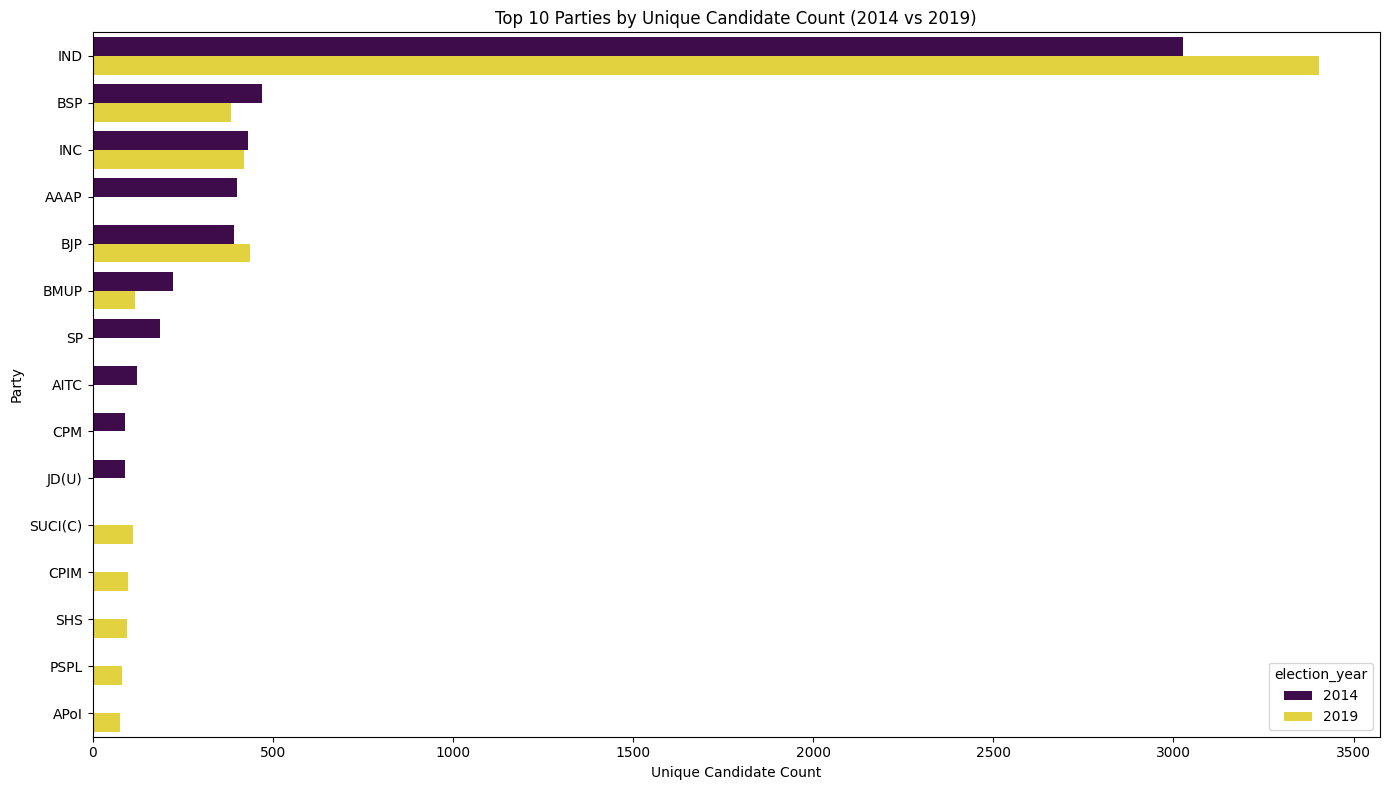

In [133]:
party_cand = (
    df1.groupby(["election_year","party"], as_index=False)
       .agg(candidate_count=("candidate","nunique"))
)

top10 = (
    party_cand.sort_values(["election_year","candidate_count"], ascending=[True, False])
              .groupby("election_year").head(10)
)

plt.figure(figsize=(14,8))
sns.barplot(data=top10, x="candidate_count", y="party", hue="election_year", orient="h", palette='viridis')
plt.title("Top 10 Parties by Unique Candidate Count (2014 vs 2019)")
plt.xlabel("Unique Candidate Count")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

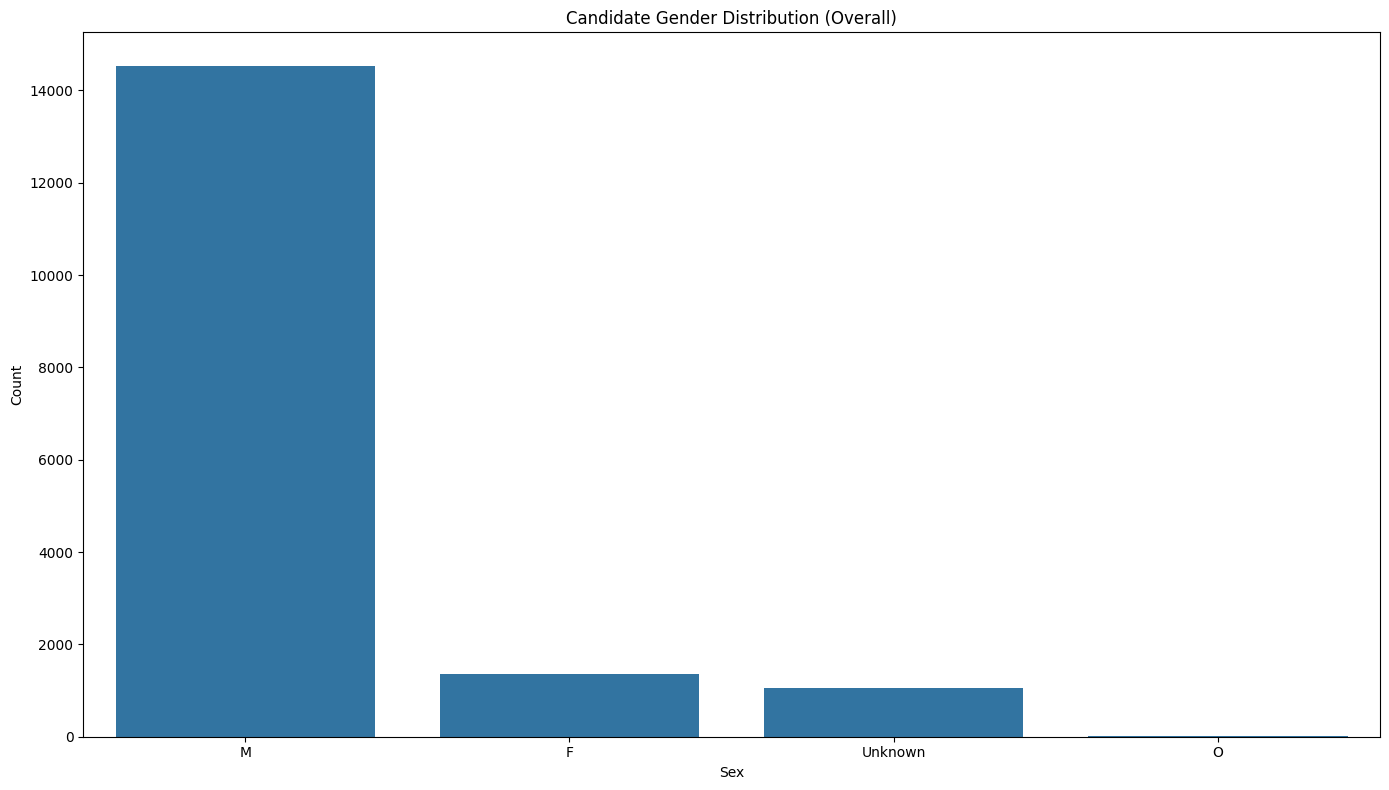

In [134]:
if "sex" in df1.columns:
    plt.figure(figsize=(14,8))
    sns.countplot(data=df1, x="sex", order=df1["sex"].value_counts().index)
    plt.title("Candidate Gender Distribution (Overall)")
    plt.xlabel("Sex")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("sex column not found")

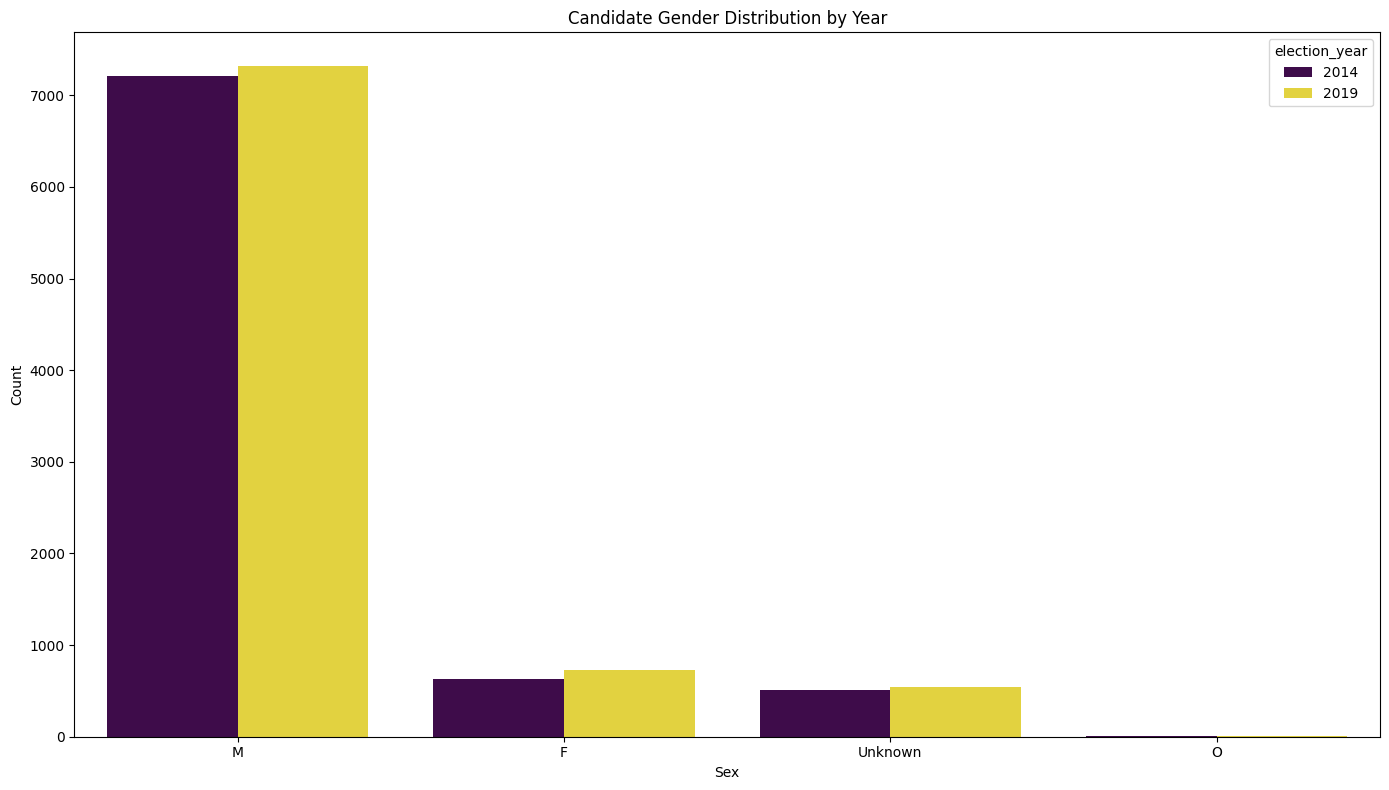

In [135]:
if "sex" in df1.columns:
    plt.figure(figsize=(14,8))
    sns.countplot(data=df1, x="sex", hue="election_year",
                  order=df1["sex"].value_counts().index, palette='viridis')
    plt.title("Candidate Gender Distribution by Year")
    plt.xlabel("Sex")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("sex column not found")

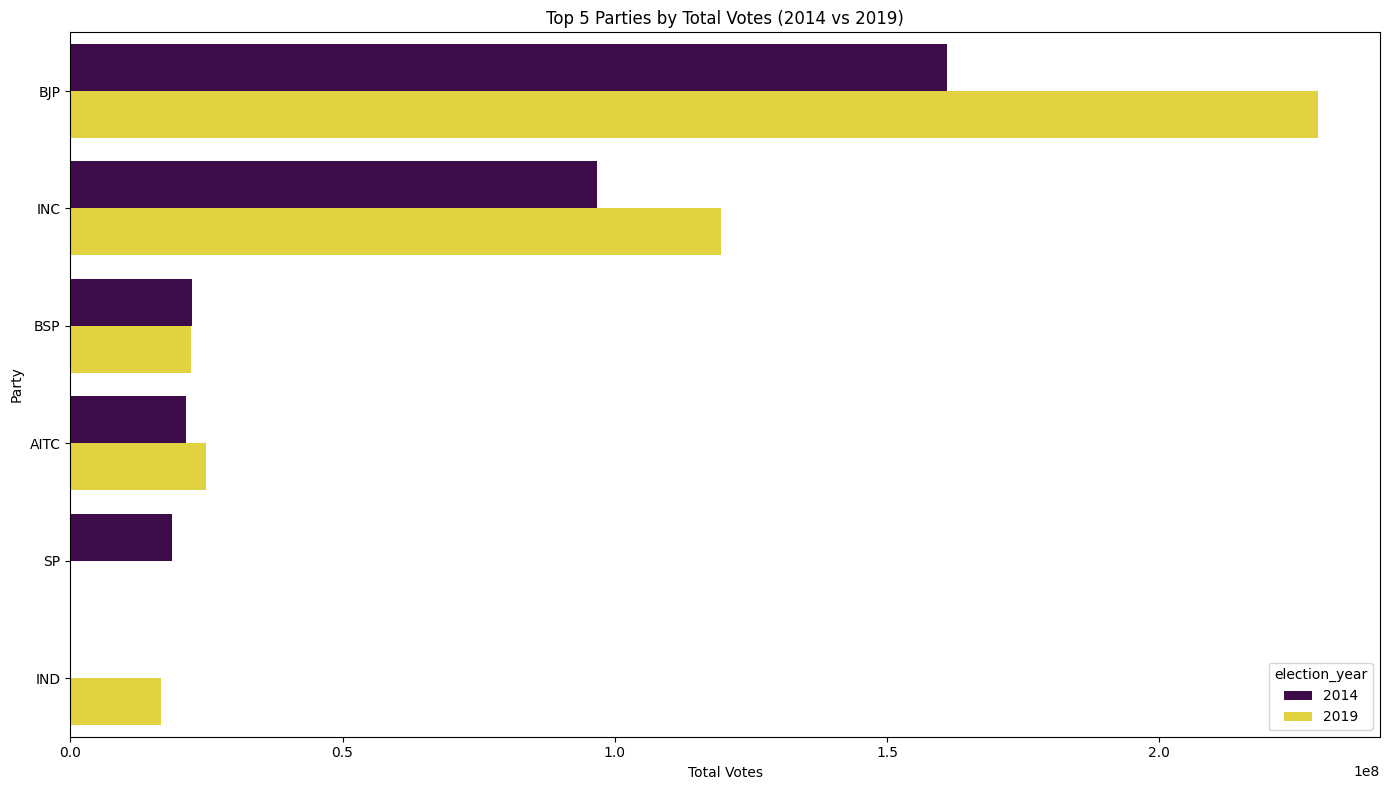

In [136]:
party_votes = (
    df1.groupby(["election_year","party"], as_index=False)
       .agg(total_votes=("total_votes","sum"))
)

top5_votes = (
    party_votes.sort_values(["election_year","total_votes"], ascending=[True, False])
              .groupby("election_year").head(5)
)

plt.figure(figsize=(14,8))
sns.barplot(data=top5_votes, x="total_votes", y="party", hue="election_year", orient="h", palette='viridis')
plt.title("Top 5 Parties by Total Votes (2014 vs 2019)")
plt.xlabel("Total Votes")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

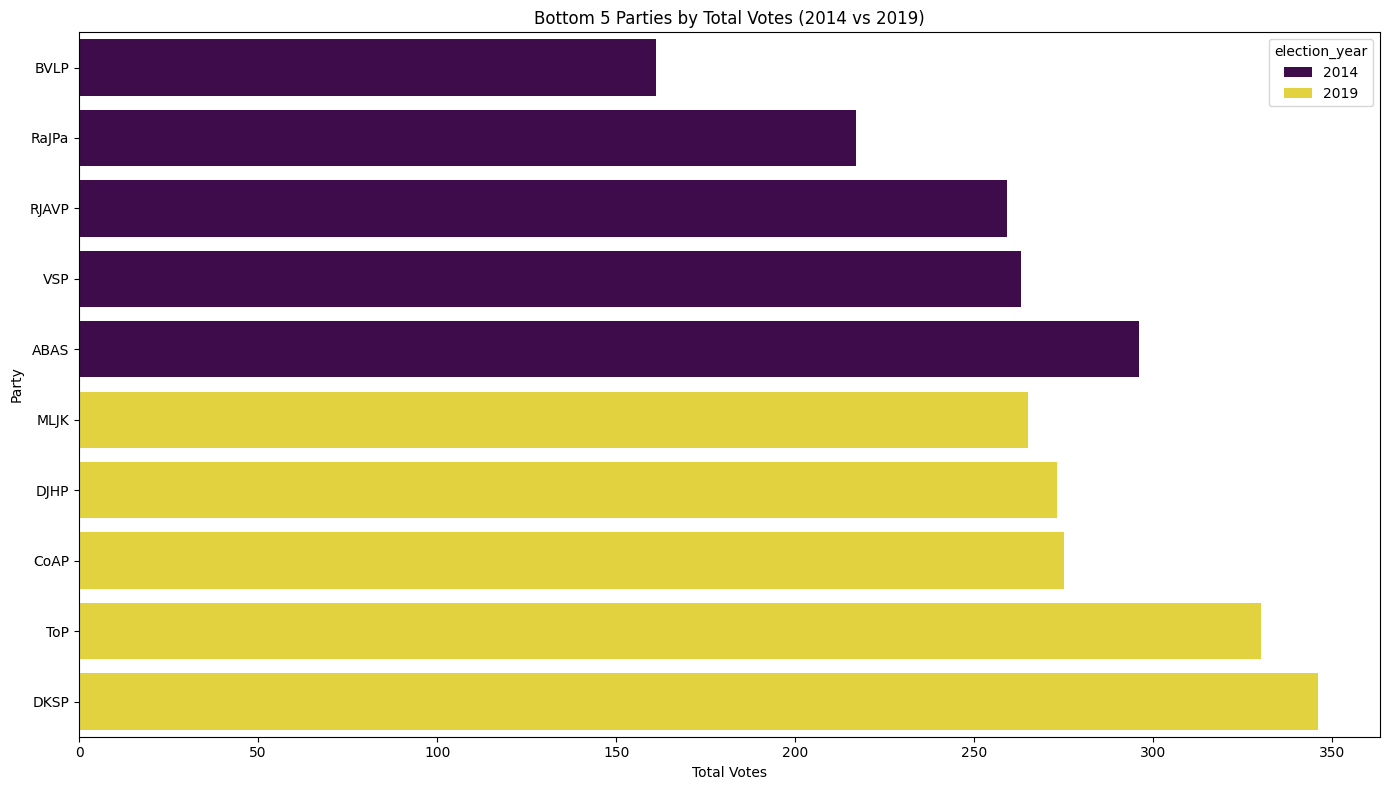

In [137]:
party_votes = (
    df1.groupby(["election_year","party"], as_index=False)
       .agg(total_votes=("total_votes","sum"))
)

bottom5_votes = (
    party_votes.sort_values(["election_year","total_votes"], ascending=[True, True])
              .groupby("election_year").head(5)
)

plt.figure(figsize=(14,8))
sns.barplot(data=bottom5_votes, x="total_votes", y="party", hue="election_year", orient="h", palette='viridis')
plt.title("Bottom 5 Parties by Total Votes (2014 vs 2019)")
plt.xlabel("Total Votes")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

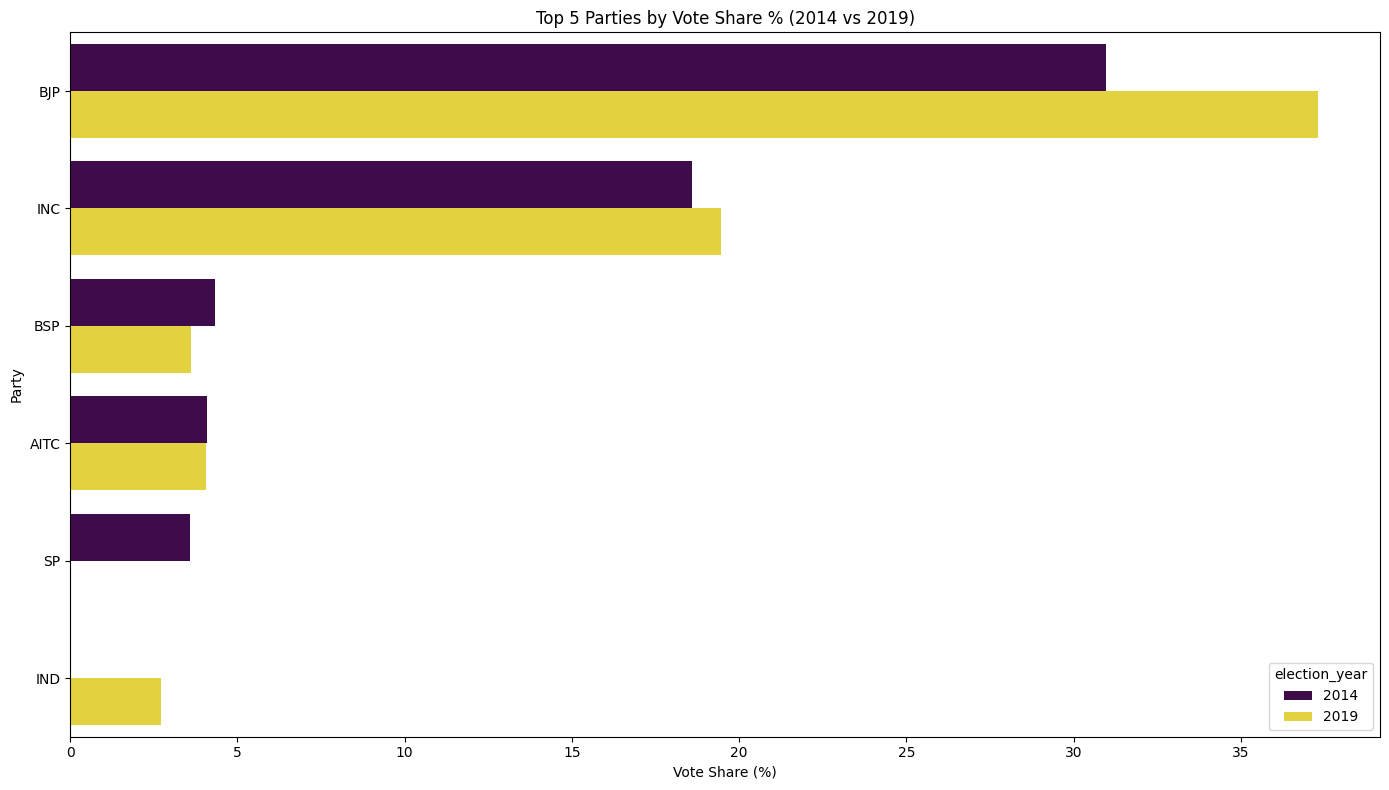

In [138]:
party_votes = (
    df1.groupby(["election_year","party"], as_index=False)
       .agg(total_votes=("total_votes","sum"))
)

year_tot = (
    df1.groupby("election_year", as_index=False)
       .agg(year_votes=("total_votes","sum"))
)

party_share = party_votes.merge(year_tot, on="election_year", how="left")
party_share["vote_share_pct"] = party_share["total_votes"] * 100 / party_share["year_votes"].replace(0, np.nan)

top5_share = (
    party_share.sort_values(["election_year","vote_share_pct"], ascending=[True, False])
               .groupby("election_year").head(5)
)

plt.figure(figsize=(14,8))
sns.barplot(data=top5_share, x="vote_share_pct", y="party", hue="election_year", orient="h", palette='viridis')
plt.title("Top 5 Parties by Vote Share % (2014 vs 2019)")
plt.xlabel("Vote Share (%)")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

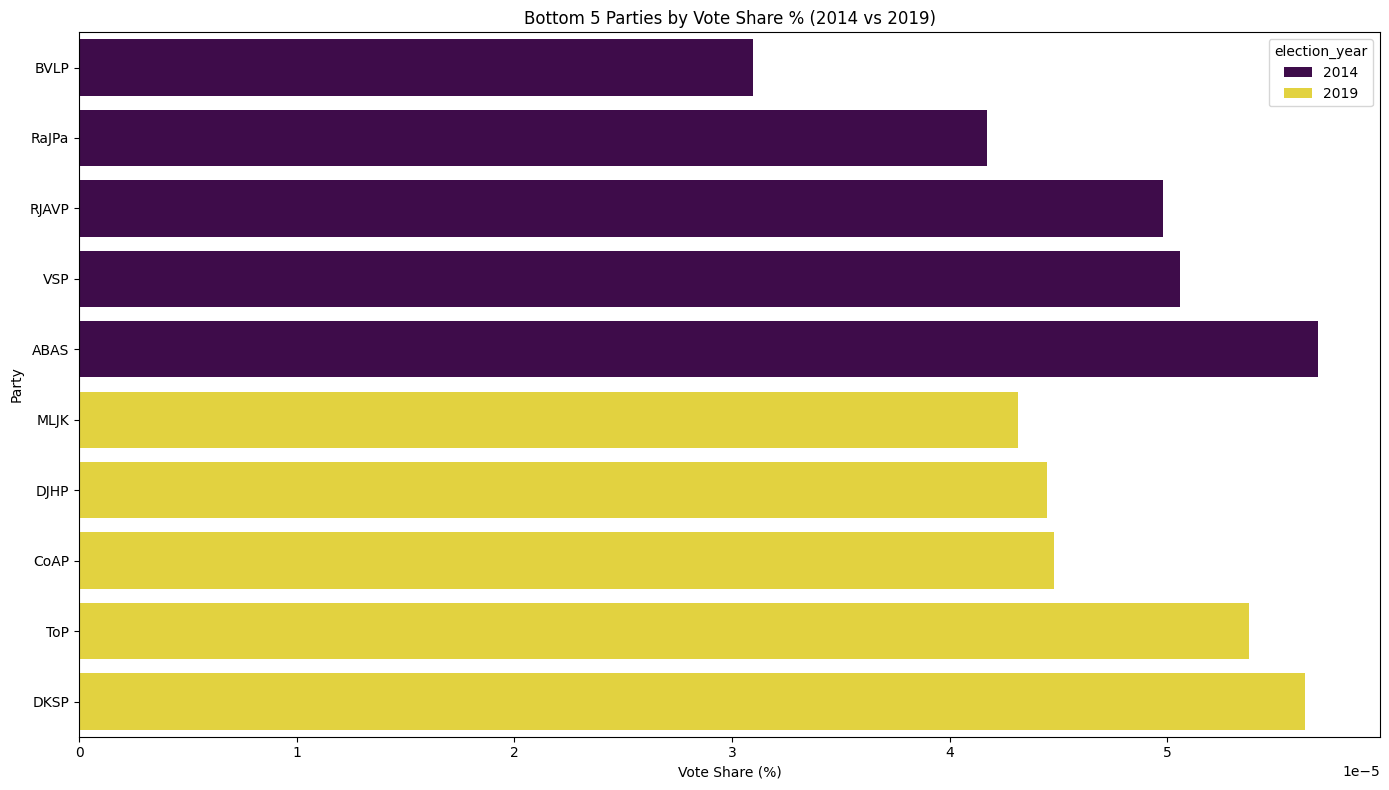

In [139]:
party_votes = (
    df1.groupby(["election_year","party"], as_index=False)
       .agg(total_votes=("total_votes","sum"))
)

year_tot = (
    df1.groupby("election_year", as_index=False)
       .agg(year_votes=("total_votes","sum"))
)

party_share = party_votes.merge(year_tot, on="election_year", how="left")
party_share["vote_share_pct"] = party_share["total_votes"] * 100 / party_share["year_votes"].replace(0, np.nan)

bottom5_share = (
    party_share.sort_values(["election_year","vote_share_pct"], ascending=[True, True])
               .groupby("election_year").head(5)
)

plt.figure(figsize=(14,8))
sns.barplot(data=bottom5_share, x="vote_share_pct", y="party", hue="election_year", orient="h", palette='viridis')
plt.title("Bottom 5 Parties by Vote Share % (2014 vs 2019)")
plt.xlabel("Vote Share (%)")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

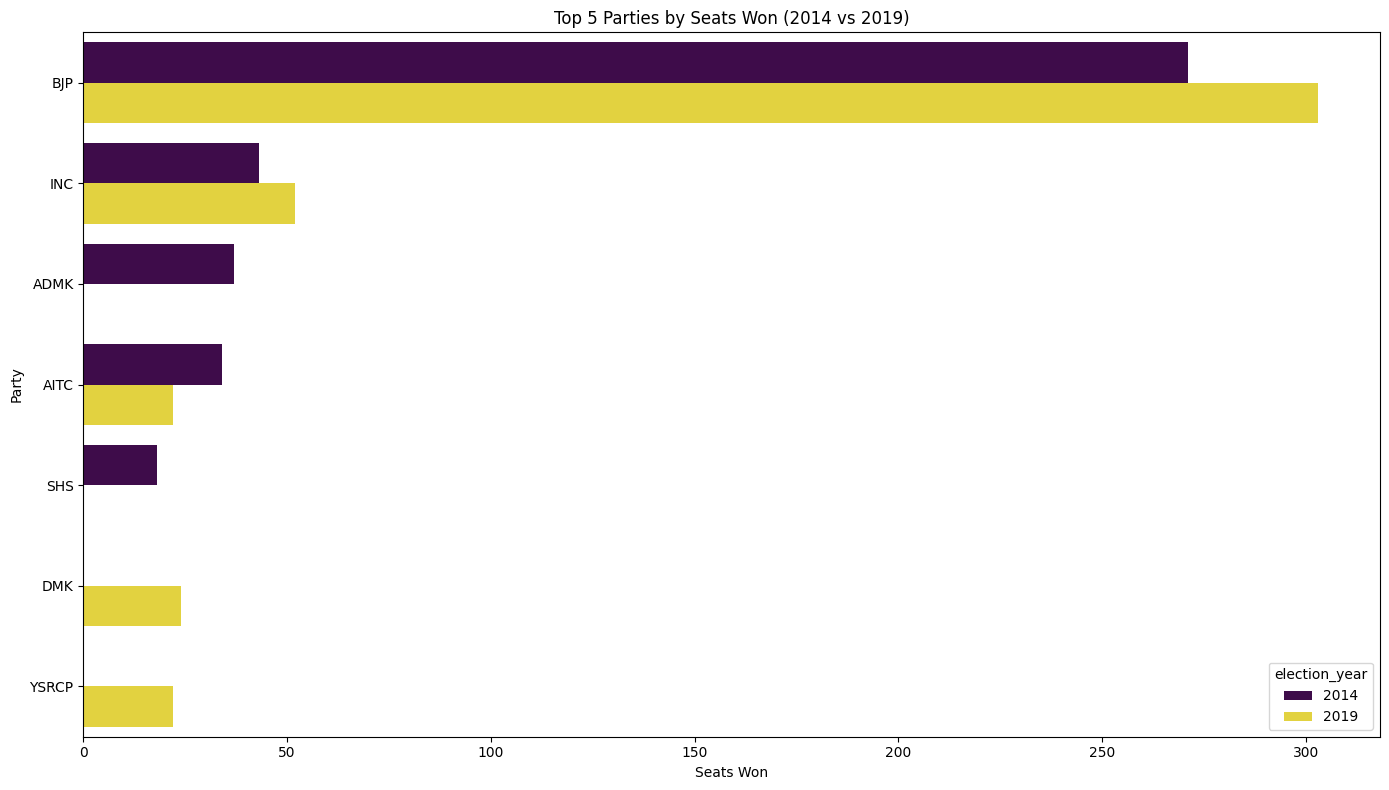

In [140]:
winners = (
    df1.sort_values(["election_year","state","pc_name","total_votes"], ascending=[True, True, True, False])
       .drop_duplicates(subset=["election_year","state","pc_name"], keep="first")
       [["election_year","party"]]
       .rename(columns={"party":"winner_party"})
)

seats = (
    winners.groupby(["election_year","winner_party"], as_index=False)
           .size()
           .rename(columns={"size":"seats_won"})
)

top5_seats = (
    seats.sort_values(["election_year","seats_won"], ascending=[True, False])
         .groupby("election_year").head(5)
)

plt.figure(figsize=(14,8))
sns.barplot(data=top5_seats, x="seats_won", y="winner_party", hue="election_year", orient="h", palette='viridis')
plt.title("Top 5 Parties by Seats Won (2014 vs 2019)")
plt.xlabel("Seats Won")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

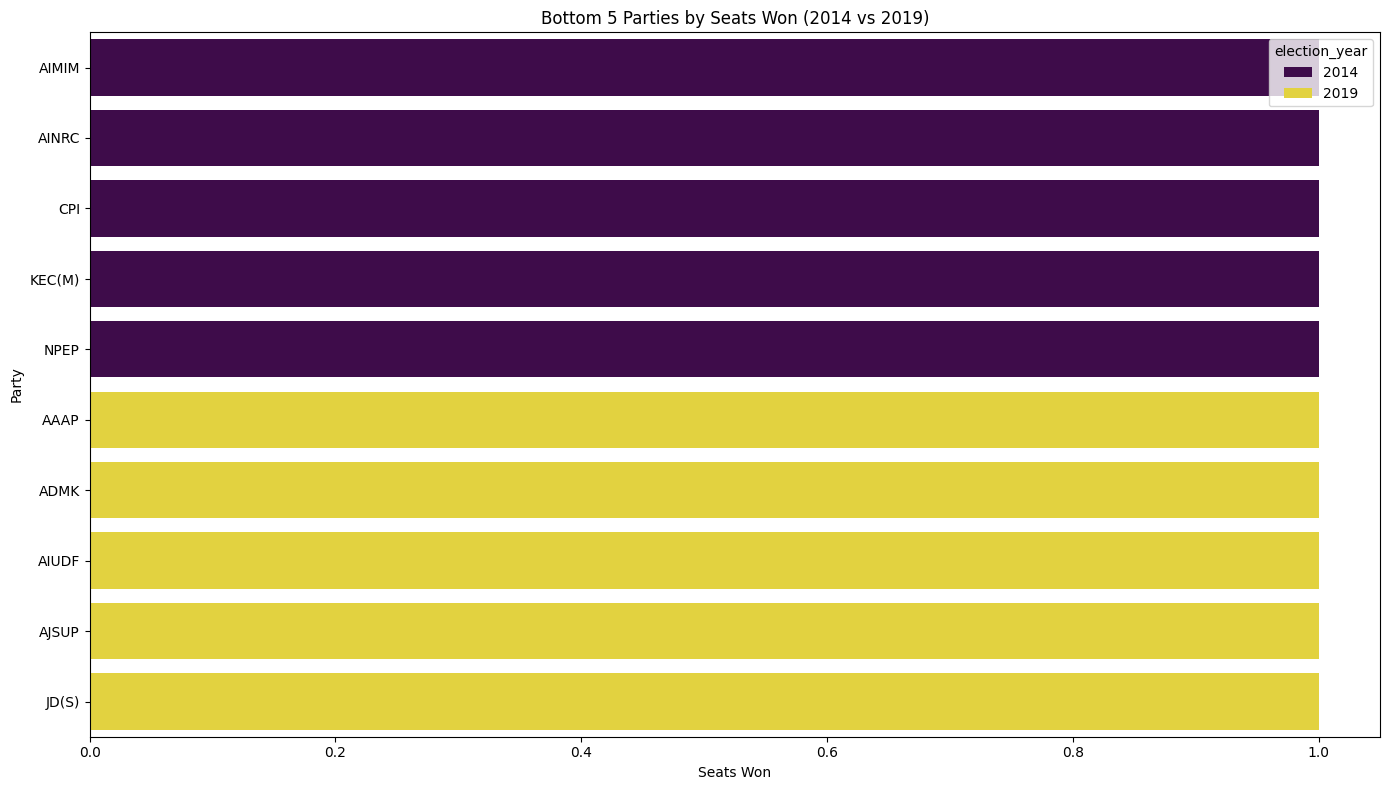

In [141]:
winners = (
    df1.sort_values(["election_year","state","pc_name","total_votes"], ascending=[True, True, True, False])
       .drop_duplicates(subset=["election_year","state","pc_name"], keep="first")
       [["election_year","party"]]
       .rename(columns={"party":"winner_party"})
)

seats = (
    winners.groupby(["election_year","winner_party"], as_index=False)
           .size()
           .rename(columns={"size":"seats_won"})
)

bottom5_seats = (
    seats.sort_values(["election_year","seats_won"], ascending=[True, True])
         .groupby("election_year").head(5)
)

plt.figure(figsize=(14,8))
sns.barplot(data=bottom5_seats, x="seats_won", y="winner_party", hue="election_year", orient="h", palette='viridis')
plt.title("Bottom 5 Parties by Seats Won (2014 vs 2019)")
plt.xlabel("Seats Won")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

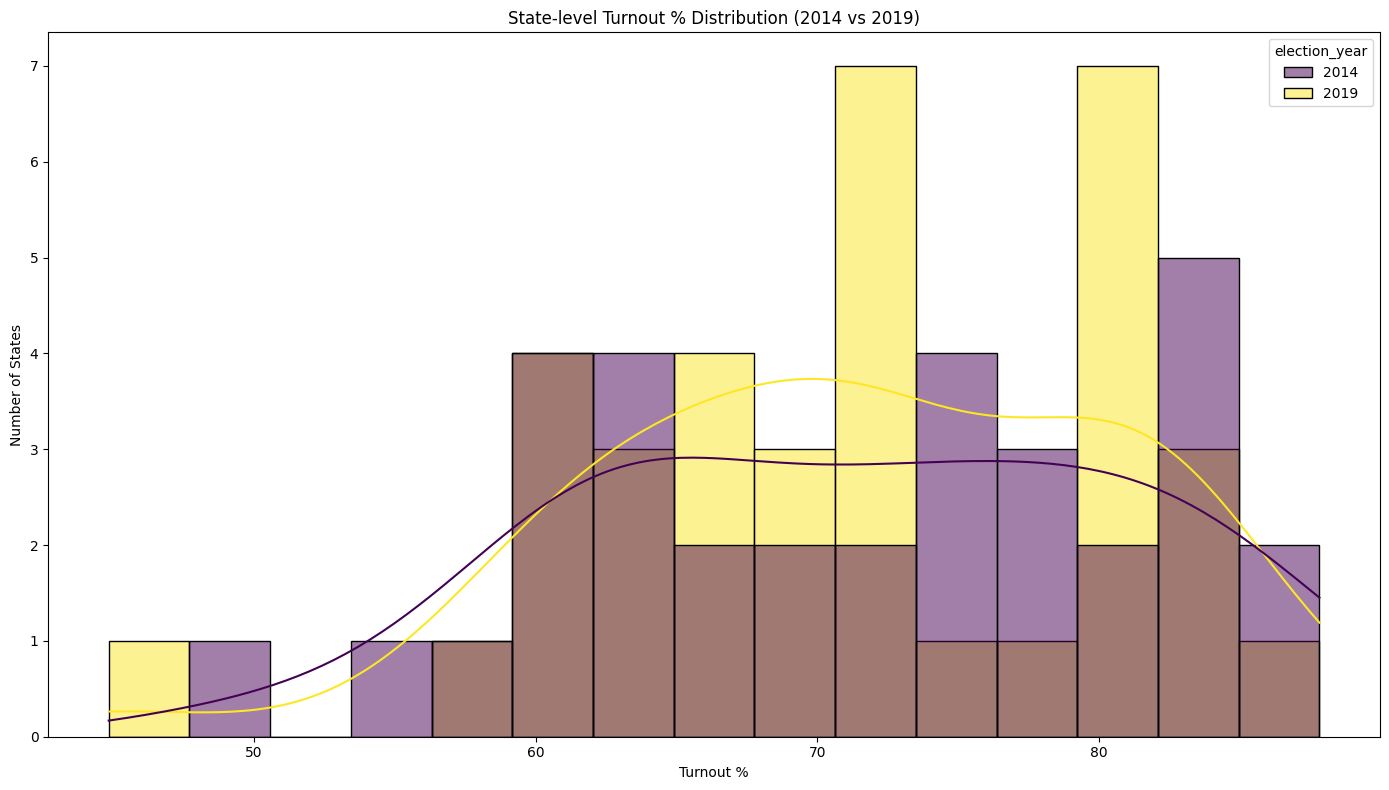

In [142]:
pc_elec = (
    df1.groupby(["election_year","state","pc_name"], as_index=False)["total_electors"]
       .max()
       .rename(columns={"total_electors":"pc_electors"})
)

state_elec = (
    pc_elec.groupby(["election_year","state"], as_index=False)["pc_electors"]
           .sum()
           .rename(columns={"pc_electors":"state_total_electors"})
)

state_votes = (
    df1.groupby(["election_year","state"], as_index=False)
       .agg(votes_cast=("total_votes","sum"))
)

state_df = state_votes.merge(state_elec, on=["election_year","state"], how="left")
state_df["turnout_pct"] = state_df["votes_cast"] * 100 / state_df["state_total_electors"].replace(0, np.nan)

plt.figure(figsize=(14,8))
sns.histplot(data=state_df, x="turnout_pct", hue="election_year", kde=True, bins=15, palette='viridis')
plt.title("State-level Turnout % Distribution (2014 vs 2019)")
plt.xlabel("Turnout %")
plt.ylabel("Number of States")
plt.tight_layout()
plt.show()

In [110]:
# 12) Quick data sanity: postal_votes > total_votes (TABLE)
bad = df1[df1["postal_votes"] > df1["total_votes"]][
    ["election_year","state","pc_name","party","candidate","postal_votes","total_votes"]
]
print("bad rows:", len(bad))
print(bad.head(20).to_string(index=False))

bad rows: 0
Empty DataFrame
Columns: [election_year, state, pc_name, party, candidate, postal_votes, total_votes]
Index: []


In [111]:
# 13) Turnout % by year (state-level) — summary table
pc_elec = df1.groupby(["election_year","state","pc_name"], as_index=False)["total_electors"].max()
state_elec = pc_elec.groupby(["election_year","state"], as_index=False)["total_electors"].sum().rename(columns={"total_electors":"state_total_electors"})
state_votes = df1.groupby(["election_year","state"], as_index=False).agg(votes_cast=("total_votes","sum"), postal_votes=("postal_votes","sum"))

state_df = state_votes.merge(state_elec, on=["election_year","state"], how="left")
state_df["turnout_pct"] = state_df["votes_cast"] * 100 / state_df["state_total_electors"].replace(0, np.nan)
state_df["postal_vote_pct"] = state_df["postal_votes"] * 100 / state_df["votes_cast"].replace(0, np.nan)

print(state_df.groupby("election_year")[["turnout_pct","postal_vote_pct"]].describe().round(2))

              turnout_pct                                                  \
                    count   mean   std    min    25%    50%    75%    max   
election_year                                                               
2014                 34.0  71.50  9.73  49.66  63.65  71.04  79.36  87.82   
2019                 36.0  71.24  9.20  44.84  64.92  71.50  80.42  85.18   

              postal_vote_pct                                            
                        count  mean   std   min   25%   50%   75%   max  
election_year                                                            
2014                     34.0  0.36  0.72  0.00  0.03  0.09  0.30  3.04  
2019                     36.0  0.58  0.81  0.03  0.20  0.33  0.53  3.85  


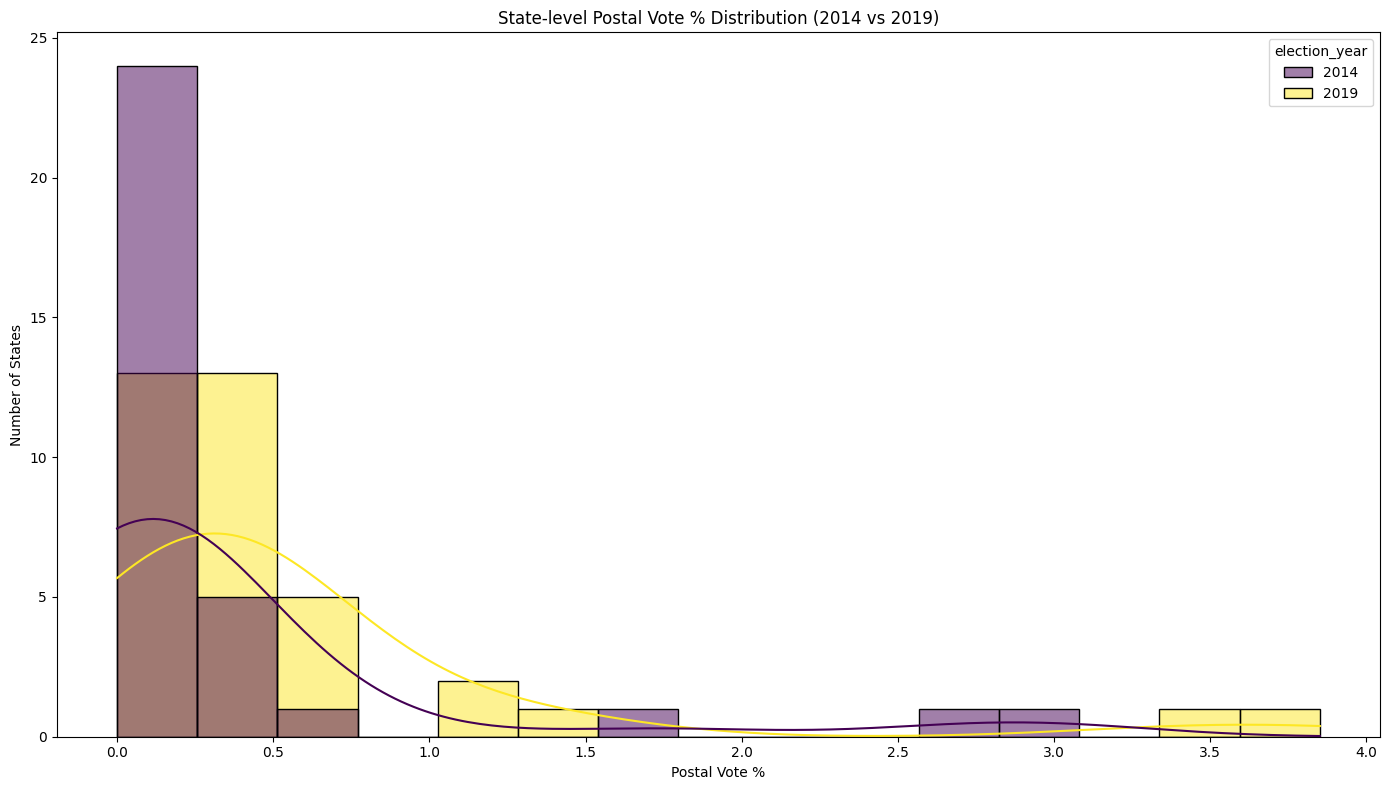

In [149]:
# 14) Postal vote % distribution by year (CHART)
plt.figure(figsize=(14,8))
sns.histplot(data=state_df, x="postal_vote_pct", hue="election_year", kde=True, bins=15, palette='viridis')
plt.title("State-level Postal Vote % Distribution (2014 vs 2019)")
plt.xlabel("Postal Vote %")
plt.ylabel("Number of States")
plt.tight_layout()
plt.show()

In [113]:
# 15) Outliers check: top/bottom states by turnout (TABLE)
top = state_df.sort_values("turnout_pct", ascending=False).groupby("election_year").head(5)
bot = state_df.sort_values("turnout_pct", ascending=True).groupby("election_year").head(5)

print("\nTop 5 turnout states each year:")
print(top[["election_year","state","turnout_pct","postal_vote_pct"]].round(2).to_string(index=False))

print("\nBottom 5 turnout states each year:")
print(bot[["election_year","state","turnout_pct","postal_vote_pct"]].round(2).to_string(index=False))


Top 5 turnout states each year:
 election_year                state  turnout_pct  postal_vote_pct
          2014             Nagaland        87.82             0.05
          2014          Lakshadweep        86.61             0.00
          2019          Lakshadweep        85.18             0.28
          2014              Tripura        84.72             0.74
          2014 Dadra & Nagar Haveli        84.07             0.00
          2014               Sikkim        83.33             3.04
          2019             Nagaland        82.91             0.42
          2019              Manipur        82.54             0.68
          2019              Tripura        82.35             0.51
          2019          West Bengal        81.72             0.19

Bottom 5 turnout states each year:
 election_year           state  turnout_pct  postal_vote_pct
          2019 Jammu & Kashmir        44.84             1.23
          2014 Jammu & Kashmir        49.66             0.10
          2014        

In [114]:
# 16) Merge NSDP into state_df (TABLE: missing NSDP states)
def norm_state(x):
    x = str(x).strip()
    x = x.replace("&", "and")
    x = " ".join(x.split())
    x = x.replace("Jammu & Kashmir", "Jammu and Kashmir")
    x = x.replace("NCT of Delhi", "Delhi")
    return x

df2["state_norm"] = df2["state_name"].apply(norm_state)
state_df["state_norm"] = state_df["state"].apply(norm_state)

df2["2013-14"] = pd.to_numeric(df2["2013-14"], errors="coerce")
df2["2018-19"] = pd.to_numeric(df2["2018-19"], errors="coerce")

state_df = state_df.merge(df2[["state_norm","2013-14","2018-19"]], on="state_norm", how="left")

state_df["pc_nsdp"] = np.where(state_df["election_year"] == 2014, state_df["2013-14"], state_df["2018-19"])

miss = state_df[state_df["pc_nsdp"].isna()][["state_norm","election_year"]].drop_duplicates().sort_values(["state_norm","election_year"])
print(miss.to_string(index=False))

            state_norm  election_year
Dadra and Nagar Haveli           2014
Dadra and Nagar Haveli           2019
         Daman and Diu           2014
         Daman and Diu           2019
           Lakshadweep           2014
           Lakshadweep           2019


### Secondary Questions

	1 .	Is there a correlation between postal votes % and voter turnout %?

In [148]:
df = df1[df1["election_year"].isin([2014, 2019])].copy()

pc_elec = (
    df.groupby(["election_year","state","pc_name"], as_index=False)["total_electors"]
      .max()
      .rename(columns={"total_electors":"pc_electors"})
)

state_elec = (
    pc_elec.groupby(["election_year","state"], as_index=False)["pc_electors"]
           .sum()
           .rename(columns={"pc_electors":"state_total_electors"})
)

state_votes = (
    df.groupby(["election_year","state"], as_index=False)
      .agg(votes_cast=("total_votes","sum"),
           postal_votes=("postal_votes","sum"))
)

state_df = state_votes.merge(state_elec, on=["election_year","state"], how="left")

state_df["turnout_pct"] = state_df["votes_cast"] * 100 / state_df["state_total_electors"].replace(0, np.nan)
state_df["postal_vote_pct"] = state_df["postal_votes"] * 100 / state_df["votes_cast"].replace(0, np.nan)

state_df = state_df.dropna(subset=["turnout_pct","postal_vote_pct"]).copy()
state_df.head()

,election_year,state,votes_cast,postal_votes,state_total_electors,turnout_pct,postal_vote_pct
0,2014,Andaman & Nicobar Islands,190328,115,269360,70.659341,0.060422
1,2014,Andhra Pradesh,48367188,238710,64934138,74.486533,0.493537
2,2014,Arunachal Pradesh,596956,16192,759344,78.614699,2.712428
3,2014,Assam,15085883,5877,18837713,80.083410,0.038957
4,2014,Bihar,35885332,14893,63800160,56.246461,0.041502


In [116]:
from scipy.stats import pearsonr, spearmanr

def corr_block(d, label):
    x = d["postal_vote_pct"].astype(float)
    y = d["turnout_pct"].astype(float)

    r_p, p_p = pearsonr(x, y)
    r_s, p_s = spearmanr(x, y)

    print(f"\n{label} | n={len(d)}")
    print(f"Pearson r={r_p:.4f}, p={p_p:.6f}")
    print(f"Spearman rho={r_s:.4f}, p={p_s:.6f}")

corr_block(state_df, "Overall (2014+2019)")
for yr in [2014, 2019]:
    corr_block(state_df[state_df["election_year"] == yr], f"Year {yr}")


Overall (2014+2019) | n=70
Pearson r=0.1437, p=0.235202
Spearman rho=-0.0271, p=0.823650

Year 2014 | n=34
Pearson r=0.1652, p=0.350456
Spearman rho=-0.1572, p=0.374510

Year 2019 | n=36
Pearson r=0.1326, p=0.440735
Spearman rho=0.0129, p=0.940614


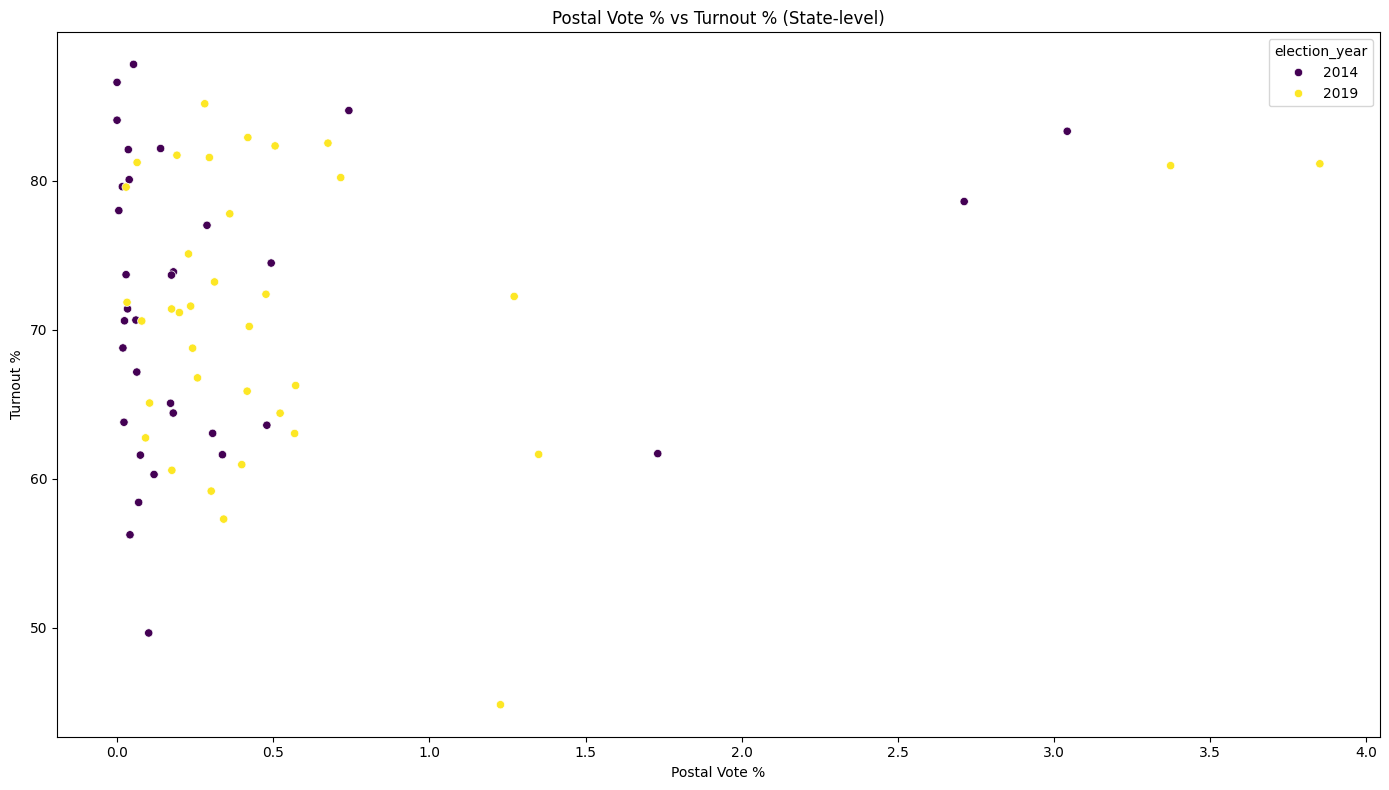

In [150]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=state_df, x="postal_vote_pct", y="turnout_pct", hue="election_year", palette='viridis')
plt.title("Postal Vote % vs Turnout % (State-level)")
plt.xlabel("Postal Vote %")
plt.ylabel("Turnout %")
plt.tight_layout()
plt.show()

2.	Is there any correlation between GDP of a state and voter turnout %??

In [118]:
df = df1[df1["election_year"].isin([2014, 2019])].copy()

pc_elec = (
    df.groupby(["election_year","state","pc_name"], as_index=False)["total_electors"]
      .max()
      .rename(columns={"total_electors":"pc_electors"})
)

state_elec = (
    pc_elec.groupby(["election_year","state"], as_index=False)["pc_electors"]
           .sum()
           .rename(columns={"pc_electors":"state_total_electors"})
)

state_votes = (
    df.groupby(["election_year","state"], as_index=False)
      .agg(votes_cast=("total_votes","sum"))
)

state_df = state_votes.merge(state_elec, on=["election_year","state"], how="left")
state_df["turnout_pct"] = state_df["votes_cast"] * 100 / state_df["state_total_electors"].replace(0, np.nan)

def norm_state(x):
    x = str(x).strip()
    x = x.replace("&", "and")
    x = " ".join(x.split())
    x = x.replace("Jammu & Kashmir", "Jammu and Kashmir")
    x = x.replace("NCT of Delhi", "Delhi")
    return x

state_df["state_norm"] = state_df["state"].apply(norm_state)
df2["state_norm"] = df2["state_name"].apply(norm_state)

df2["2013-14"] = pd.to_numeric(df2["2013-14"], errors="coerce")
df2["2018-19"] = pd.to_numeric(df2["2018-19"], errors="coerce")

state_df = state_df.merge(df2[["state_norm","2013-14","2018-19"]], on="state_norm", how="left")

state_df["pc_nsdp"] = np.where(
    state_df["election_year"] == 2014,
    state_df["2013-14"],
    state_df["2018-19"]
)

corr_nsdp = state_df.dropna(subset=["turnout_pct","pc_nsdp"]).copy()
corr_nsdp.head()

,election_year,state,votes_cast,state_total_electors,turnout_pct,state_norm,2013-14,2018-19,pc_nsdp
0,2014,Andaman & Nicobar Islands,190328,269360,70.659341,Andaman and Nicobar Islands,111087.0,204254.0,111087.0
1,2014,Andhra Pradesh,30250855,38946048,77.673748,Andhra Pradesh,82870.0,154031.0,82870.0
2,2014,Arunachal Pradesh,596956,759344,78.614699,Arunachal Pradesh,94135.0,155103.0,94135.0
3,2014,Assam,15085883,18837713,80.083410,Assam,49734.0,81034.0,49734.0
4,2014,Bihar,35885332,63800160,56.246461,Bihar,26948.0,40715.0,26948.0


In [119]:
from scipy.stats import pearsonr, spearmanr

def corr_block(d, label):
    x = d["pc_nsdp"].astype(float)
    y = d["turnout_pct"].astype(float)

    r_p, p_p = pearsonr(x, y)
    r_s, p_s = spearmanr(x, y)

    print(f"\n{label} | n={len(d)}")
    print(f"Pearson r={r_p:.4f}, p={p_p:.6f}")
    print(f"Spearman rho={r_s:.4f}, p={p_s:.6f}")

corr_block(corr_nsdp, "Overall (2014+2019)")
for yr in [2014, 2019]:
    corr_block(corr_nsdp[corr_nsdp["election_year"] == yr], f"Year {yr}")


Overall (2014+2019) | n=64
Pearson r=0.1034, p=0.416175
Spearman rho=0.0838, p=0.510128

Year 2014 | n=31
Pearson r=0.1922, p=0.300381
Spearman rho=0.1673, p=0.368236

Year 2019 | n=33
Pearson r=0.0691, p=0.702217
Spearman rho=-0.0314, p=0.862210


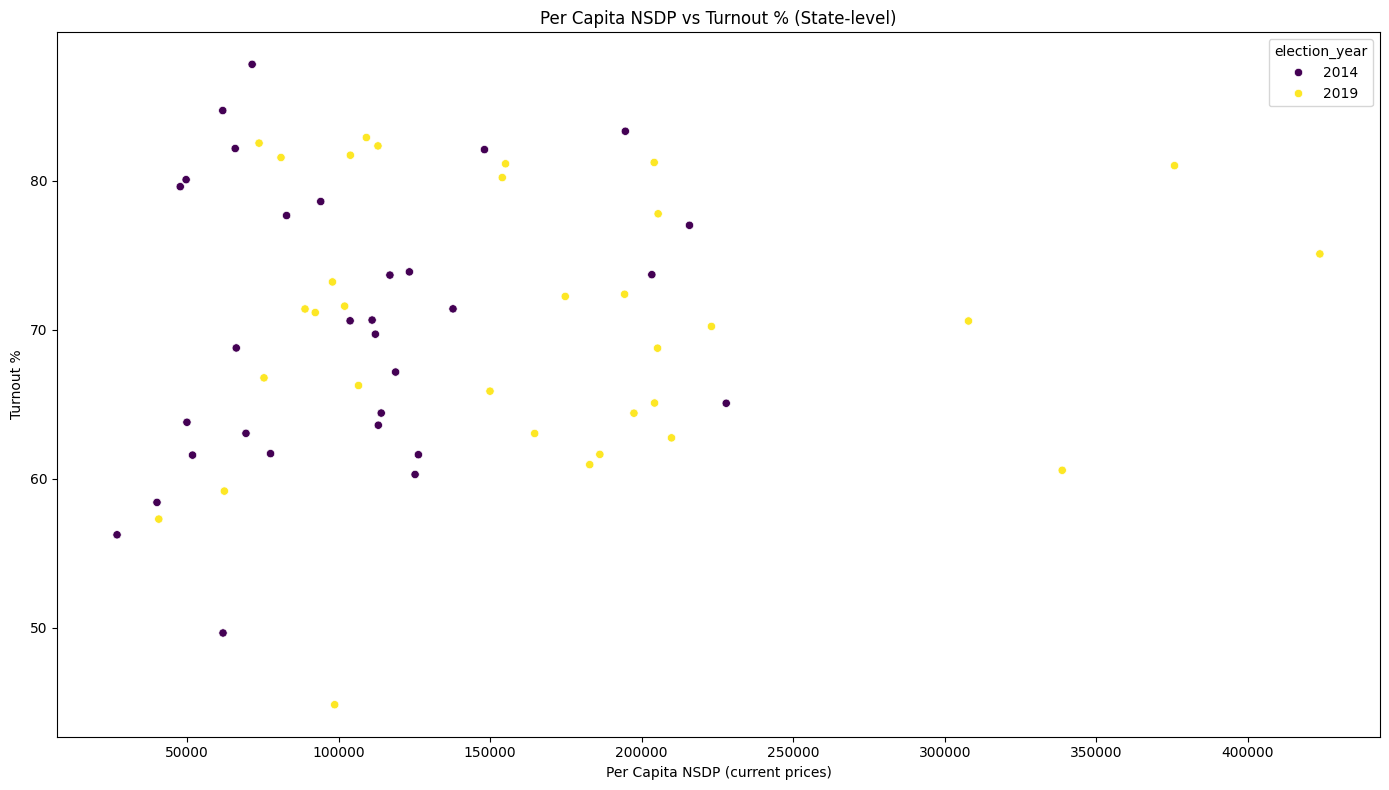

In [145]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=corr_nsdp, x="pc_nsdp", y="turnout_pct", hue="election_year", palette='viridis')
plt.title("Per Capita NSDP vs Turnout % (State-level)")
plt.xlabel("Per Capita NSDP (current prices)")
plt.ylabel("Turnout %")
plt.tight_layout()
plt.show()

In [121]:
missing = state_df[state_df["pc_nsdp"].isna()][["state_norm","election_year"]].drop_duplicates()
print(missing.sort_values(["state_norm","election_year"]).to_string(index=False))

            state_norm  election_year
Dadra and Nagar Haveli           2014
Dadra and Nagar Haveli           2019
         Daman and Diu           2014
         Daman and Diu           2019
           Lakshadweep           2014
           Lakshadweep           2019


3.	Is there any correlation between literacy % of a state and voter turnout %?

In [122]:
df1["state"] = df1["state"].astype(str).str.strip()

# 1) Standardize Delhi naming
df1["state"] = df1["state"].replace({
    "Nct of Delhi": "Delhi",
    "NCT of Delhi": "Delhi",
    "National Capital Territory of Delhi": "Delhi",
    "Delhi (NCT)": "Delhi"
})

# 2) Standardize Odisha/Orissa
df1["state"] = df1["state"].replace({
    "Odisha": "Orissa"
})

# 3) Telangana handling:
# If any Telangana rows exist in 2014, they are almost certainly mis-labeled in your data.
# Move them back to Andhra Pradesh for 2014 only (keeps 2019 Telangana intact).
mask_tel_2014 = (df1["election_year"] == 2014) & (df1["state"].str.strip().str.lower() == "telangana")
df1.loc[mask_tel_2014, "state"] = "Andhra Pradesh"

# Optional: if you have any weird spacing/casing left
df1["state"] = (
    df1["state"].astype(str)
       .str.replace(r"\s+", " ", regex=True)
       .str.strip()
)

# Quick verification output
print("Remaining unmatched (after fix) will be shown when you rerun your missing-states check.")
print("Delhi rows:", (df1["state"] == "Delhi").sum())
print("Orissa rows:", (df1["state"] == "Orissa").sum())
print("Telangana rows by year:")
print(df1[df1["state"] == "Telangana"].groupby("election_year").size())

Remaining unmatched (after fix) will be shown when you rerun your missing-states check.
Delhi rows: 328
Orissa rows: 195
Telangana rows by year:
election_year
2019    460
dtype: int64


In [123]:
df = df1[df1["election_year"].isin([2014, 2019])].copy()

pc_elec = (
    df.groupby(["election_year","state","pc_name"], as_index=False)["total_electors"]
      .max()
      .rename(columns={"total_electors":"pc_electors"})
)

state_elec = (
    pc_elec.groupby(["election_year","state"], as_index=False)["pc_electors"]
           .sum()
           .rename(columns={"pc_electors":"state_total_electors"})
)

state_votes = (
    df.groupby(["election_year","state"], as_index=False)
      .agg(votes_cast=("total_votes","sum"))
)

state_df = state_votes.merge(state_elec, on=["election_year","state"], how="left")
state_df["turnout_pct"] = state_df["votes_cast"] * 100 / state_df["state_total_electors"].replace(0, np.nan)

state_df.head()

,election_year,state,votes_cast,state_total_electors,turnout_pct
0,2014,Andaman & Nicobar Islands,190328,269360,70.659341
1,2014,Andhra Pradesh,48367188,64934138,74.486533
2,2014,Arunachal Pradesh,596956,759344,78.614699
3,2014,Assam,15085883,18837713,80.083410
4,2014,Bihar,35885332,63800160,56.246461


In [124]:
# 2) Fetch literacy via BeautifulSoup (one snippet)
import requests
from bs4 import BeautifulSoup

url = "https://www.census2011.co.in/literacy.php"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0 Safari/537.36"
}

r = requests.get(url, headers=headers, timeout=30)
r.raise_for_status()

soup = BeautifulSoup(r.text, "html.parser")
table = soup.find("table")
if table is None:
    raise ValueError("No table found on page")

rows = table.find_all("tr")
header = [th.get_text(" ", strip=True) for th in rows[0].find_all(["th","td"])]

data = []
for tr in rows[1:]:
    cols = [td.get_text(" ", strip=True) for td in tr.find_all(["td","th"])]
    if cols and len(cols) == len(header):
        data.append(cols)

lit = pd.DataFrame(data, columns=header)
lit.head()

,#,State,Literacy,Male,Female,% Change
0,-,India,74.04,82.14,65.46,8.66
1,1,Kerala,94.00,96.11,92.07,3.14
2,2,Lakshadweep,91.85,95.56,87.95,5.19
3,3,Mizoram,91.33,93.35,89.27,2.53
4,4,Goa,88.70,92.65,84.66,6.69


In [125]:
# 3) Clean literacy to state_name, literacy_pct (one snippet)
lit.columns = [str(c).strip().lower() for c in lit.columns]

state_col = next((c for c in lit.columns if "state" in c), lit.columns[0])
lit_candidates = [c for c in lit.columns if "literacy" in c]
lit_col = next((c for c in lit_candidates if "total" in c or "rate" in c or "%" in c), None)
lit_col = lit_col if lit_col else (lit_candidates[0] if lit_candidates else lit.columns[1])

lit_out = lit[[state_col, lit_col]].copy()
lit_out.columns = ["state_name", "literacy_pct"]

lit_out["state_name"] = lit_out["state_name"].astype(str).str.strip()
lit_out["literacy_pct"] = (
    lit_out["literacy_pct"].astype(str)
          .str.replace("%","", regex=False)
          .str.replace(",","", regex=False)
          .str.strip()
)
lit_out["literacy_pct"] = pd.to_numeric(lit_out["literacy_pct"], errors="coerce")
lit_out = lit_out.dropna(subset=["literacy_pct"]).copy()

lit_out.head()

,state_name,literacy_pct
0,India,74.04
1,Kerala,94.00
2,Lakshadweep,91.85
3,Mizoram,91.33
4,Goa,88.70


In [126]:
# 4) Normalize state names + merge (one snippet)
def norm_state(x):
    x = str(x).strip()
    x = x.replace("&", "and")
    x = " ".join(x.split())
    x = x.replace("Jammu & Kashmir", "Jammu and Kashmir")
    x = x.replace("NCT of Delhi", "Delhi")
    return x

state_df["state_norm"] = state_df["state"].apply(norm_state)
lit_out["state_norm"] = lit_out["state_name"].apply(norm_state)

lit_turnout = state_df.merge(lit_out[["state_norm","literacy_pct"]], on="state_norm", how="left")
lit_turnout = lit_turnout.dropna(subset=["turnout_pct","literacy_pct"]).copy()

lit_turnout.head()

,election_year,state,votes_cast,state_total_electors,turnout_pct,state_norm,literacy_pct
0,2014,Andaman & Nicobar Islands,190328,269360,70.659341,Andaman and Nicobar Islands,86.63
1,2014,Andhra Pradesh,48367188,64934138,74.486533,Andhra Pradesh,67.02
2,2014,Arunachal Pradesh,596956,759344,78.614699,Arunachal Pradesh,65.38
3,2014,Assam,15085883,18837713,80.083410,Assam,72.19
4,2014,Bihar,35885332,63800160,56.246461,Bihar,61.80


In [127]:
# 5) Correlation: Pearson + Spearman (overall + year-wise) (one snippet)
from scipy.stats import pearsonr, spearmanr

def corr_block(d, label):
    x = d["literacy_pct"].astype(float)
    y = d["turnout_pct"].astype(float)

    r_p, p_p = pearsonr(x, y)
    r_s, p_s = spearmanr(x, y)

    print(f"\n{label} | n={len(d)}")
    print(f"Pearson r={r_p:.4f}, p={p_p:.6f}")
    print(f"Spearman rho={r_s:.4f}, p={p_s:.6f}")

corr_block(lit_turnout, "Overall (2014+2019)")
for yr in [2014, 2019]:
    corr_block(lit_turnout[lit_turnout["election_year"] == yr], f"Year {yr}")


Overall (2014+2019) | n=68
Pearson r=0.3273, p=0.006444
Spearman rho=0.2960, p=0.014265

Year 2014 | n=33
Pearson r=0.3922, p=0.023963
Spearman rho=0.3590, p=0.040220

Year 2019 | n=35
Pearson r=0.2617, p=0.128913
Spearman rho=0.2263, p=0.191076


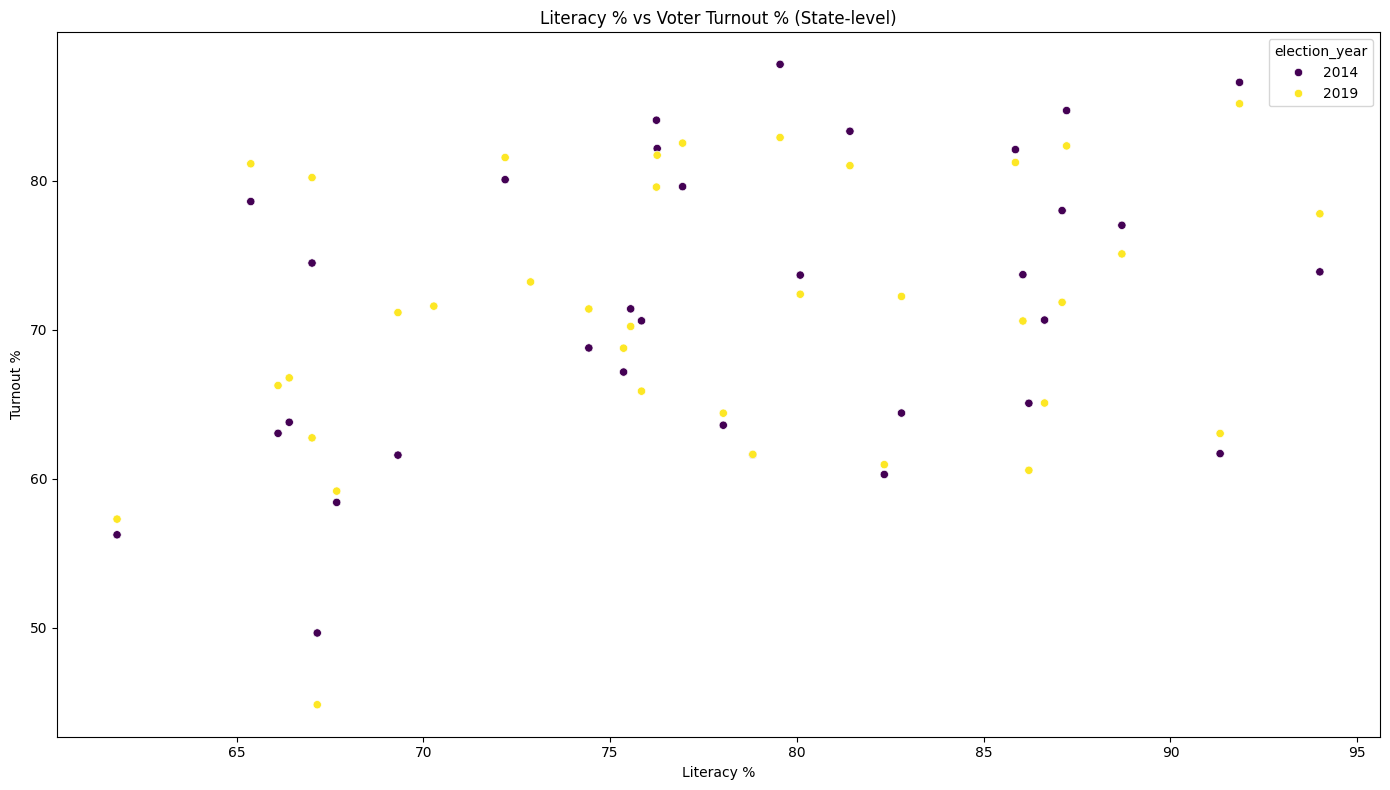

In [146]:
# 6) Visual check (one snippet, one chart)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.scatterplot(data=lit_turnout, x="literacy_pct", y="turnout_pct", hue="election_year", palette='viridis')
plt.title("Literacy % vs Voter Turnout % (State-level)")
plt.xlabel("Literacy %")
plt.ylabel("Turnout %")
plt.tight_layout()
plt.show()

In [129]:
# 7) Missing states after merge (one snippet)
missing = state_df.merge(lit_out[["state_norm","literacy_pct"]], on="state_norm", how="left")
missing = missing[missing["literacy_pct"].isna()][["state_norm"]].drop_duplicates().sort_values("state_norm")
print(missing.to_string(index=False))

state_norm
 Telangana


### Note on Telangana Literacy Data (Census 2011)

The literacy dataset used in this analysis is sourced from the **Census 2011**, where the state of **Telangana did not exist as a separate administrative entity** (it was officially formed in 2014 after bifurcation from Andhra Pradesh).

Therefore, Telangana does not appear independently in the 2011 literacy table.  
To ensure consistency and completeness in the correlation analysis, Telangana has been mapped back to **Andhra Pradesh** for the purpose of literacy-based comparison.

This limitation should be considered while interpreting the results, as state-level literacy information for Telangana is not available separately in Census 2011.

In [130]:
# Telangana not present in Census 2011, so map it to Andhra Pradesh for literacy correlation
lit_turnout["state_norm"] = lit_turnout["state_norm"].replace({
    "Telangana": "Andhra Pradesh"
})

# Re-merge literacy after mapping
lit_turnout = state_df.copy()

lit_turnout["state_norm"] = lit_turnout["state"].apply(norm_state)
lit_out["state_norm"] = lit_out["state_name"].apply(norm_state)

# Apply Telangana → Andhra Pradesh mapping
lit_turnout["state_norm"] = lit_turnout["state_norm"].replace({
    "Telangana": "Andhra Pradesh"
})

# Merge literacy again
lit_turnout = lit_turnout.merge(
    lit_out[["state_norm", "literacy_pct"]],
    on="state_norm",
    how="left"
)

# Drop missing values for correlation
lit_turnout = lit_turnout.dropna(subset=["turnout_pct", "literacy_pct"]).copy()

print("Rows available after Telangana adjustment:", len(lit_turnout))

Rows available after Telangana adjustment: 69


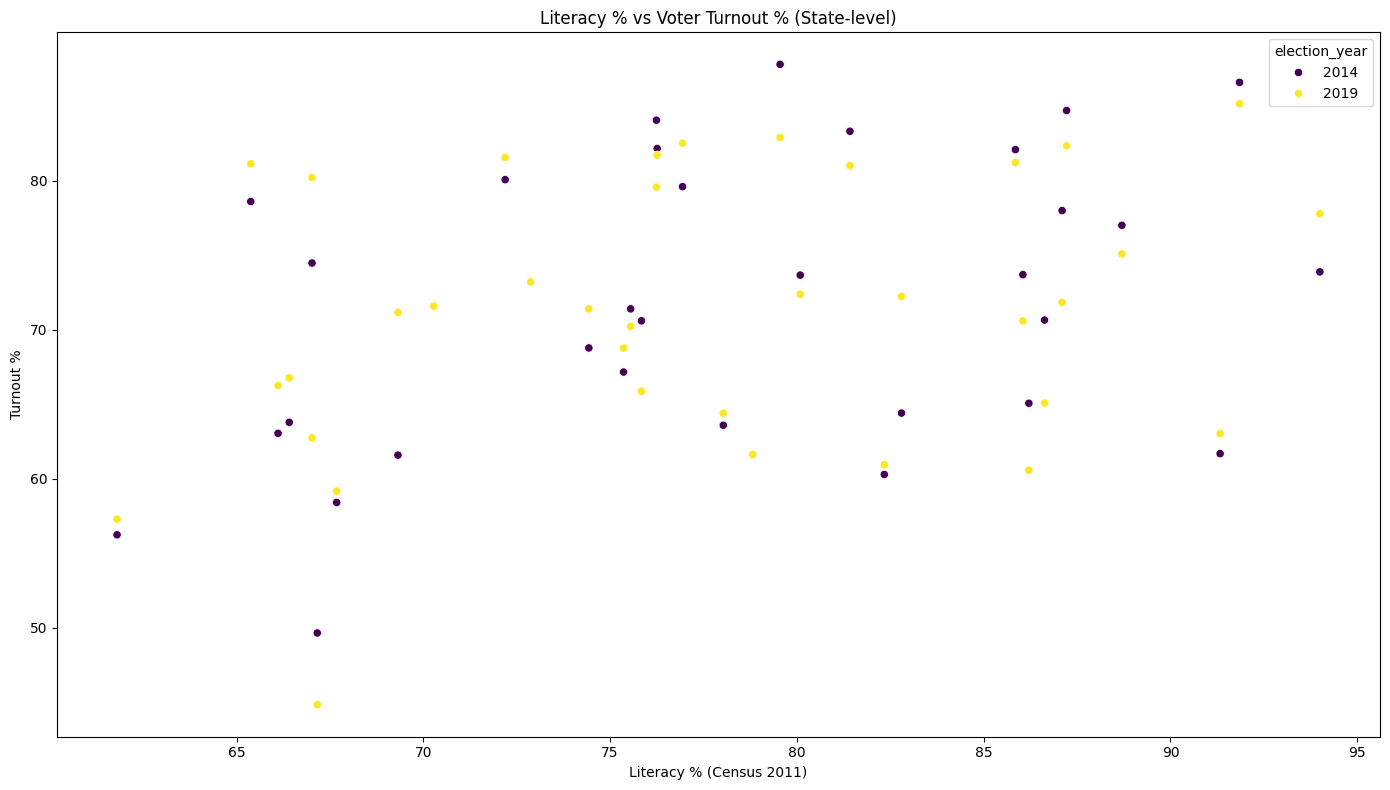

In [147]:
plt.figure(figsize=(14,8))
sns.scatterplot(
    data=lit_turnout,
    x="literacy_pct",
    y="turnout_pct",
    hue="election_year",
    palette='viridis'
)

plt.title("Literacy % vs Voter Turnout % (State-level)")
plt.xlabel("Literacy % (Census 2011)")
plt.ylabel("Turnout %")
plt.tight_layout()
plt.show()